In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [19]:
# Load dataset
df = pd.read_csv('data/fake_job_postings.csv')  # Replace with your dataset path
# Display basic info


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [21]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [22]:
# Handling missing values
df.fillna('', inplace=True)


In [23]:

# Removing irrelevant columns
if 'job_id' in df.columns:
    df.drop(columns=['job_id'], inplace=True)

# Encoding target variable
label_encoder = LabelEncoder()
df['fraudulent'] = label_encoder.fit_transform(df['fraudulent'])  

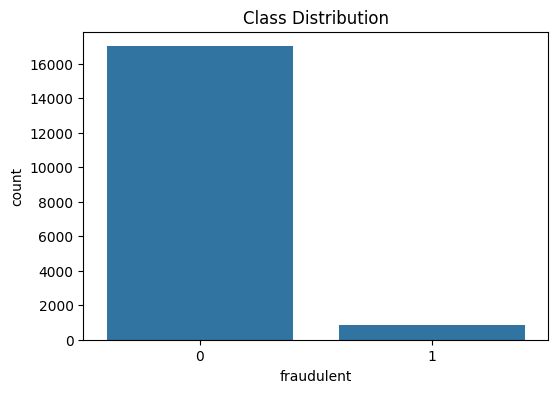

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fraudulent')
plt.title('Class Distribution')
plt.show()


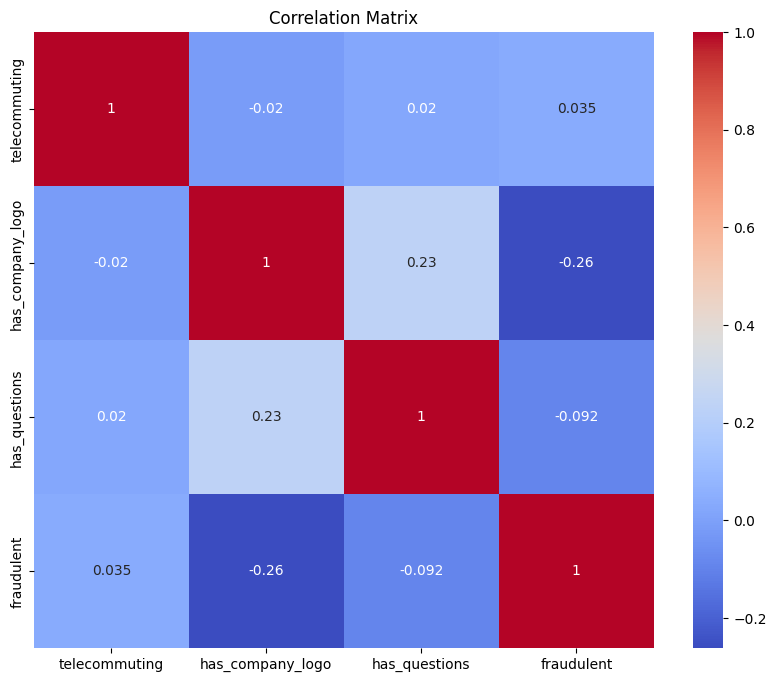

In [29]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Check if there are enough numeric columns for correlation
if numeric_df.shape[1] > 1:  # Ensure there is more than one numeric column
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis.")


In [30]:
# Extracting text features using TF-IDF
tfidf = TfidfVectorizer(max_features=500)
job_desc_features = tfidf.fit_transform(df['description']).toarray()

In [31]:
# Combine TF-IDF with other numerical features
numerical_features = ['telecommuting', 'has_company_logo', 'has_questions']  # Replace with your columns
X = np.hstack([job_desc_features, df[numerical_features].values])
y = df['fraudulent']

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [34]:

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [35]:
# Hybrid Approach: Voting
final_preds = (log_preds + rf_preds) / 2 >= 0.5

In [36]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, final_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.93      0.55      0.69       271

    accuracy                           0.98      5364
   macro avg       0.95      0.78      0.84      5364
weighted avg       0.97      0.98      0.97      5364



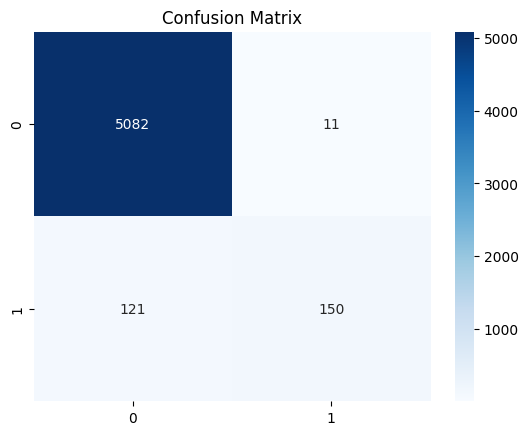

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

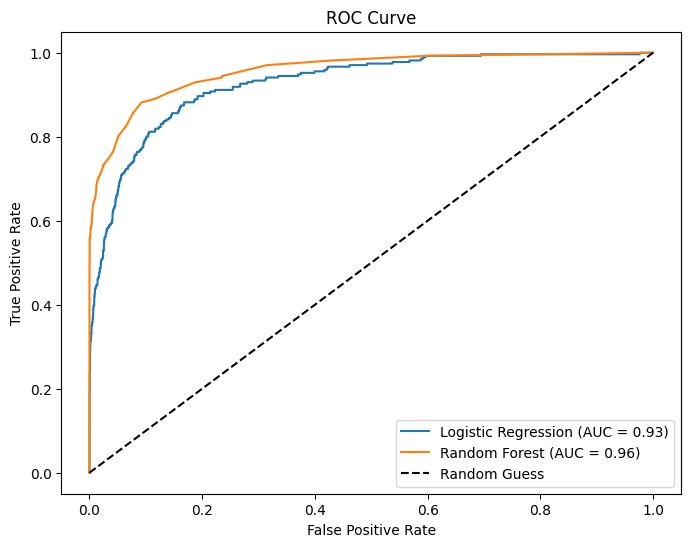

In [38]:
# ROC Curve
log_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {log_roc_auc:.2f})')

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
